# Logistic Regression  

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [142]:
df = pd.read_csv('winequality-red.csv')
df.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [143]:
miss_val = df.isnull().sum()
print('Missing values in each column:', miss_val)
print('total missing:', miss_val.sum())

Missing values in each column: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
total missing: 0


In [144]:
inf_val = np.isinf(df).sum()
print('Infinite values in each column:', inf_val)
print('total infinite values:', inf_val.sum())

Infinite values in each column: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
total infinite values: 0


### There are no missing or infinite values in the dataset 

In [145]:
print('Dataset info:')
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [146]:
df['quality_bin'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

X = df.drop(columns= ['quality', 'quality_bin'] )
y = df['quality_bin']

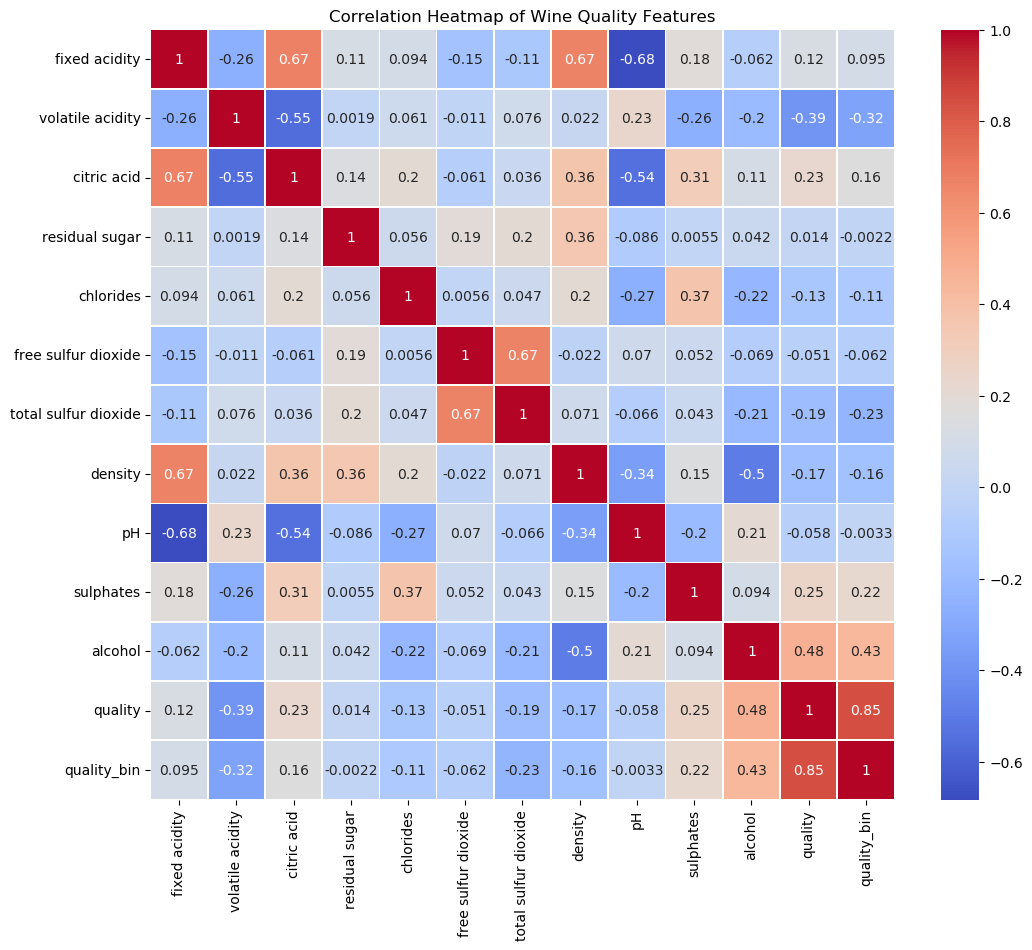

In [147]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Quality Features')
plt.show()

### Some key observations:

- Alcohol has a moderate positive correlation with quality.
- Volatile acidity has a moderate negative correlation with quality.
- Density has a strong negative correlation with alcohol content.
- Fixed acidity and citric acid have a positive correlation with density.

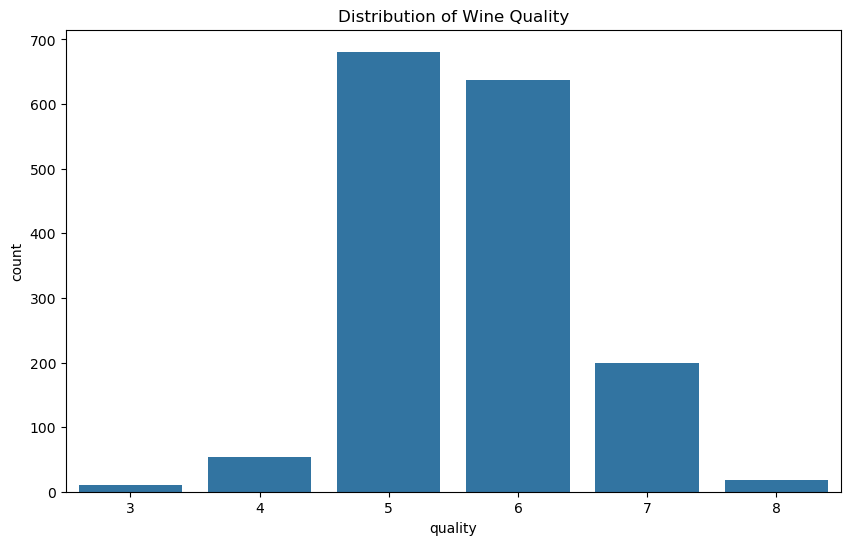

In [148]:
# Plot distribution of the target variable (Quality)
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()

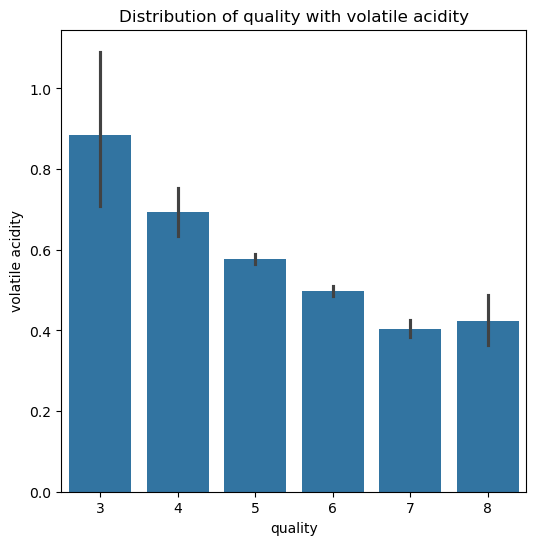

In [149]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.title('Distribution of quality with volatile acidity')
plt.show()

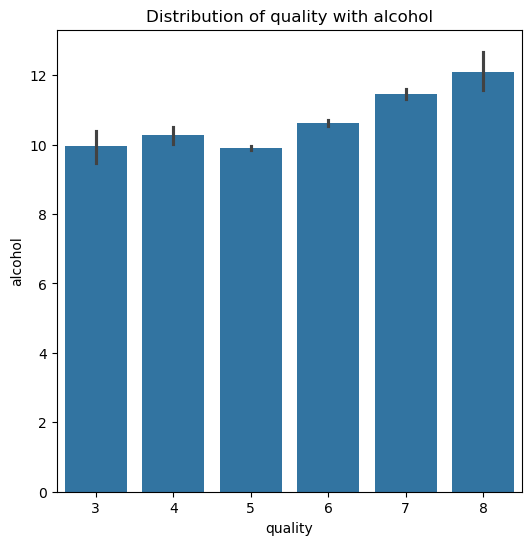

In [150]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='alcohol',data=df)
plt.title('Distribution of quality with alcohol')
plt.show()

##### Zscore Normalization

In [151]:
x_norm=(X-X.mean())/X.std()
x_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243


##### test train split using standard test size

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=605)


In [153]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Sigmoid Function 

In [154]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Sigmoid and Function to train logistic model


In [155]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_model(X, y, learn_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)

        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        weights -= learn_rate * dw
        bias -= learn_rate * db

    return weights, bias

#### Prediction Function

In [156]:
def logistic_prediction(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_cls

In [157]:
weights, bias = logistic_model(x_train, y_train, learn_rate=0.01, epochs=1000)

In [158]:
test_pred = logistic_prediction(x_test, weights, bias)
train_pred = logistic_prediction(x_train, weights, bias)

In [159]:
train_accuracy = accuracy_score(y_train, train_pred) * 100
test_accuracy = accuracy_score(y_test, test_pred) * 100
print(f'Training Accuracy: {train_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

Training Accuracy: 73.48%
Test Accuracy: 76.75%
